# CV2 SqueezeNet

Caffe models from [here](https://github.com/DeepScale/SqueezeNet/tree/master/SqueezeNet_v1.1).

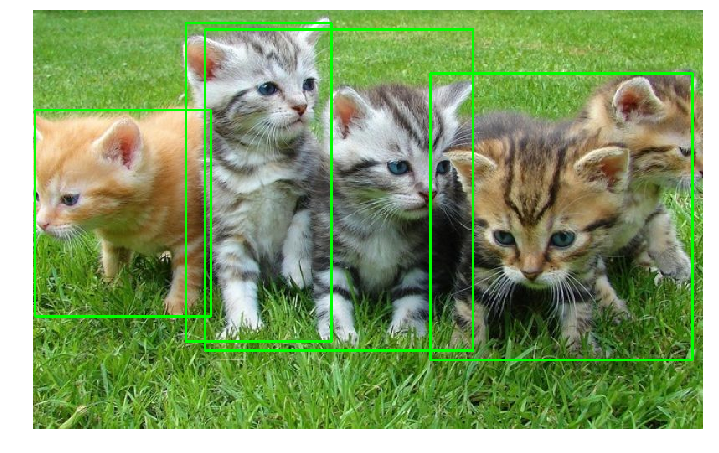

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

classes = [
    "background", 
    "aeroplane", 
    "bicycle", 
    "bird", 
    "boat",
    "bottle", 
    "bus", 
    "car", 
    "cat", 
    "chair", 
    "cow", 
    "diningtable",
    "dog", 
    "horse", 
    "motorbike", 
    "person", 
    "pottedplant", 
    "sheep",
    "sofa", 
    "train", 
    "tvmonitor"
]

net = cv2.dnn.readNetFromCaffe('mobilessd.prototxt', 'mobilessd.caffemodel')

image = cv2.imread('cats.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w = image.shape[:2]

resized = cv2.resize(image, (300,300))
scaled = cv2.dnn.blobFromImage(
    resized,
    0.007843,
    (300,300), 
    127.5
)

net.setInput(scaled)
detections = net.forward()

for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.3:
        idx = int(detections[0, 0, i, 1])
        this_class = classes[idx]
        if this_class == 'cat':
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            a,b,c,d = box.astype(np.int)
 
            cv2.rectangle(
                image, 
                (a,b), 
                (c,d),
                (0,255,0), 
                2
            )
            

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(image)